In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
in_out_history=pd.read_csv('checkin_checkout_history_updated.csv')
gym_location=pd.read_csv('gym_locations_data.csv')
subscription_plan=pd.read_csv('subscription_plans.csv')
user_data=pd.read_csv('users_data.csv')

In [4]:
in_out_history

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049
...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787


In [5]:
gym_location

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"
5,gym_6,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
6,gym_7,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
7,gym_8,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
8,gym_9,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
9,gym_10,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


In [6]:
subscription_plan

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [7]:
user_data

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic
...,...,...,...,...,...,...,...,...,...
4995,user_4996,Sarah,Williams,33,Male,1958-01-13,2021-08-08,Las Vegas,Basic
4996,user_4997,Linda,Brown,22,Male,1974-02-20,2023-01-22,Austin,Student
4997,user_4998,Emily,Miller,38,Non-binary,1978-03-29,2021-04-16,Atlanta,Pro
4998,user_4999,Robert,Garcia,27,Male,2002-02-01,2022-07-02,Denver,Pro


In [8]:
user_data.shape

(5000, 9)

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            5000 non-null   object
 1   first_name         5000 non-null   object
 2   last_name          5000 non-null   object
 3   age                5000 non-null   int64 
 4   gender             5000 non-null   object
 5   birthdate          5000 non-null   object
 6   sign_up_date       5000 non-null   object
 7   user_location      5000 non-null   object
 8   subscription_plan  5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [10]:
user_data.describe()

,age
count,5000.00000
mean,41.16820
std,13.53105
min,18.00000
25%,29.00000
50%,41.00000
75%,53.00000
max,64.00000


In [11]:
in_out_history

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049
...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787


In [12]:
in_out_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          300000 non-null  object
 1   gym_id           300000 non-null  object
 2   checkin_time     300000 non-null  object
 3   checkout_time    300000 non-null  object
 4   workout_type     300000 non-null  object
 5   calories_burned  300000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [13]:
in_out_history.isnull().sum()

user_id            0
gym_id             0
checkin_time       0
checkout_time      0
workout_type       0
calories_burned    0
dtype: int64

In [14]:
user= pd.merge(user_data,in_out_history,on='user_id',how='left')

In [18]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714


In [15]:
user=pd.merge(user,gym_location,on='gym_id',how='left')

In [20]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"


In [16]:
user=pd.merge(user,subscription_plan,on='subscription_plan',how='left')

In [17]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [23]:
user.head()

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."


In [18]:
user['Name'] = user['first_name'] + ' ' + user['last_name']

In [19]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features,Name
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith


In [20]:
user=user.drop(['first_name','last_name','birthdate'],axis=1)

In [21]:
df=user.iloc[:,0:1].join(user.iloc[:,-1]).join(user.iloc[:,1:-1])

In [22]:
df

,user_id,Name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [23]:
user=df

In [24]:
user

,user_id,Name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [37]:
#Univeriate Analysis

<Axes: xlabel='age', ylabel='Count'>

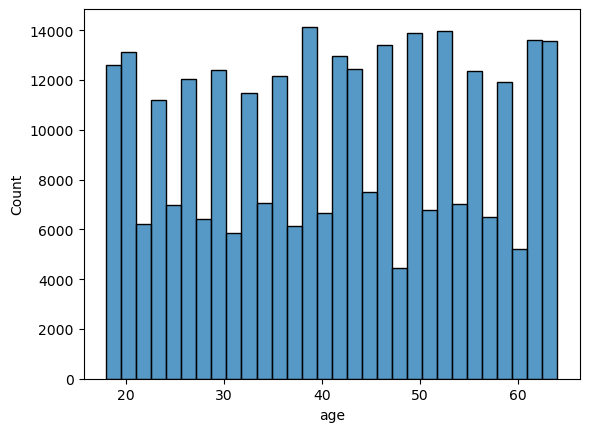

In [25]:
sns.histplot(x=user['age'],bins=30)

<Axes: xlabel='subscription_plan', ylabel='count'>

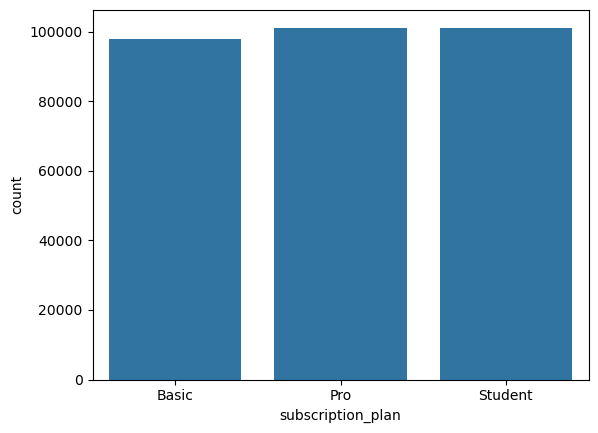

In [26]:
sns.countplot(x='subscription_plan', data=user)

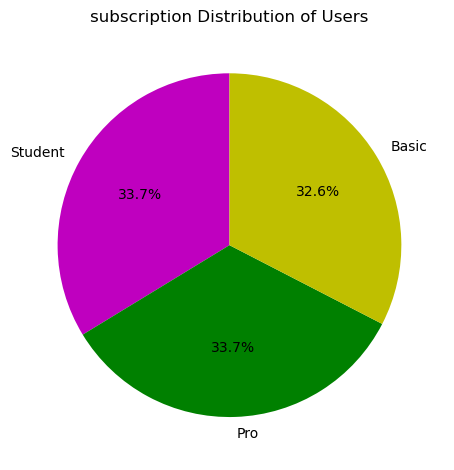

In [27]:
sub_count = user['subscription_plan'].value_counts()
plt.pie(sub_count, labels = sub_count.index, autopct = '%1.1f%%', startangle=90, colors = ['m','g','y'])
plt.title('subscription Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

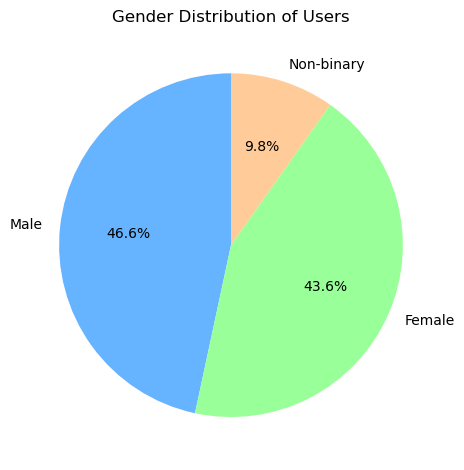

In [28]:
gender_counts = user['gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['#66b3ff','#99ff99','#ffcc99'])
plt.title('Gender Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

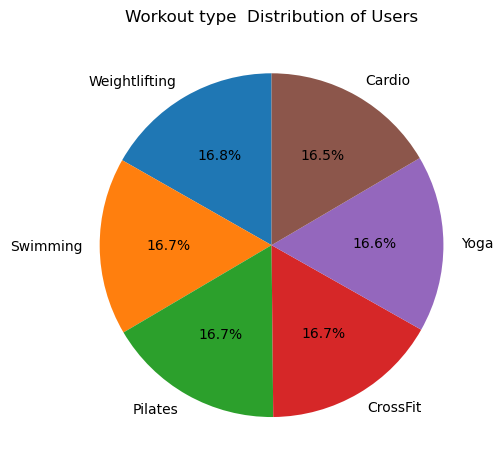

In [29]:
workout = user['workout_type'].value_counts()
plt.pie(workout, labels = workout.index, autopct = '%1.1f%%', startangle=90)
plt.title('Workout type  Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

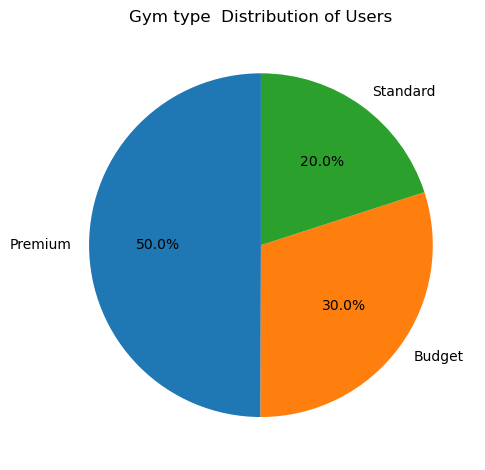

In [30]:
gymtype = user['gym_type'].value_counts()
plt.pie(gymtype, labels = gymtype.index, autopct = '%1.1f%%', startangle=90)
plt.title('Gym type  Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Bivariate/Multivariate Analysis:

In [49]:
#gym type and their charges as per their location

(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 [Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45'),
  Text(50.0, 0, '50'),
  Text(55.0, 0, '55')])

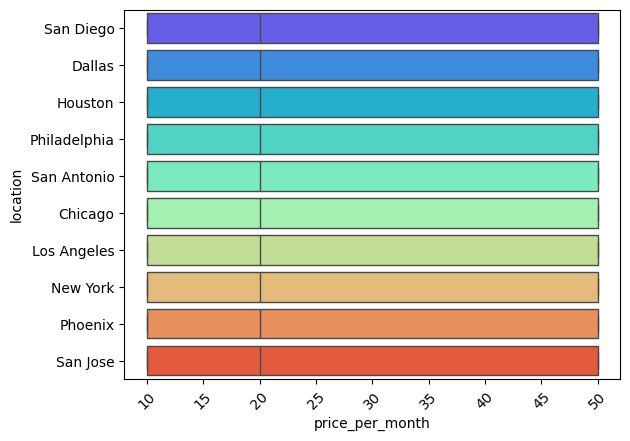

In [31]:
sns.boxplot(y=user['location'],x=user['price_per_month'],palette='rainbow')
plt.xticks(rotation=45)

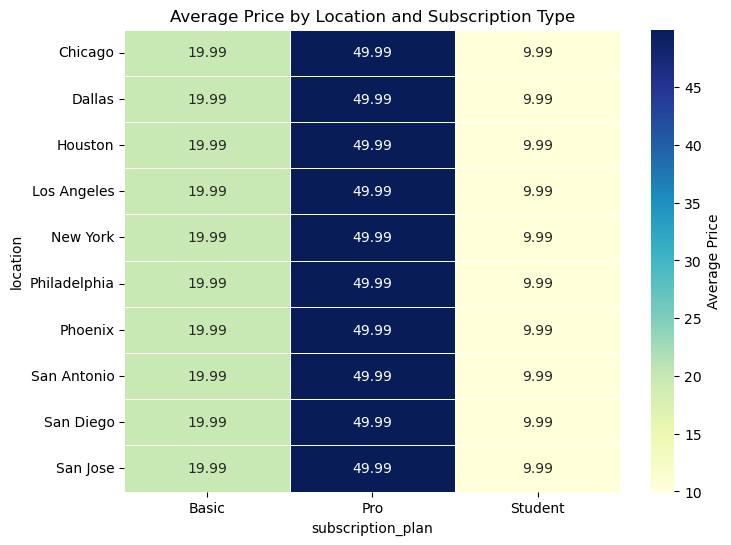

In [32]:
pivot_table = user.pivot_table(index='location', columns='subscription_plan', values='price_per_month', aggfunc='mean')

# Step 2: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Location and Subscription Type')
plt.show()

Analysis shows that price varies as per the subscription plan and it is independent of gym_type and location

In [56]:
#which gender in each location prefer which type of workout

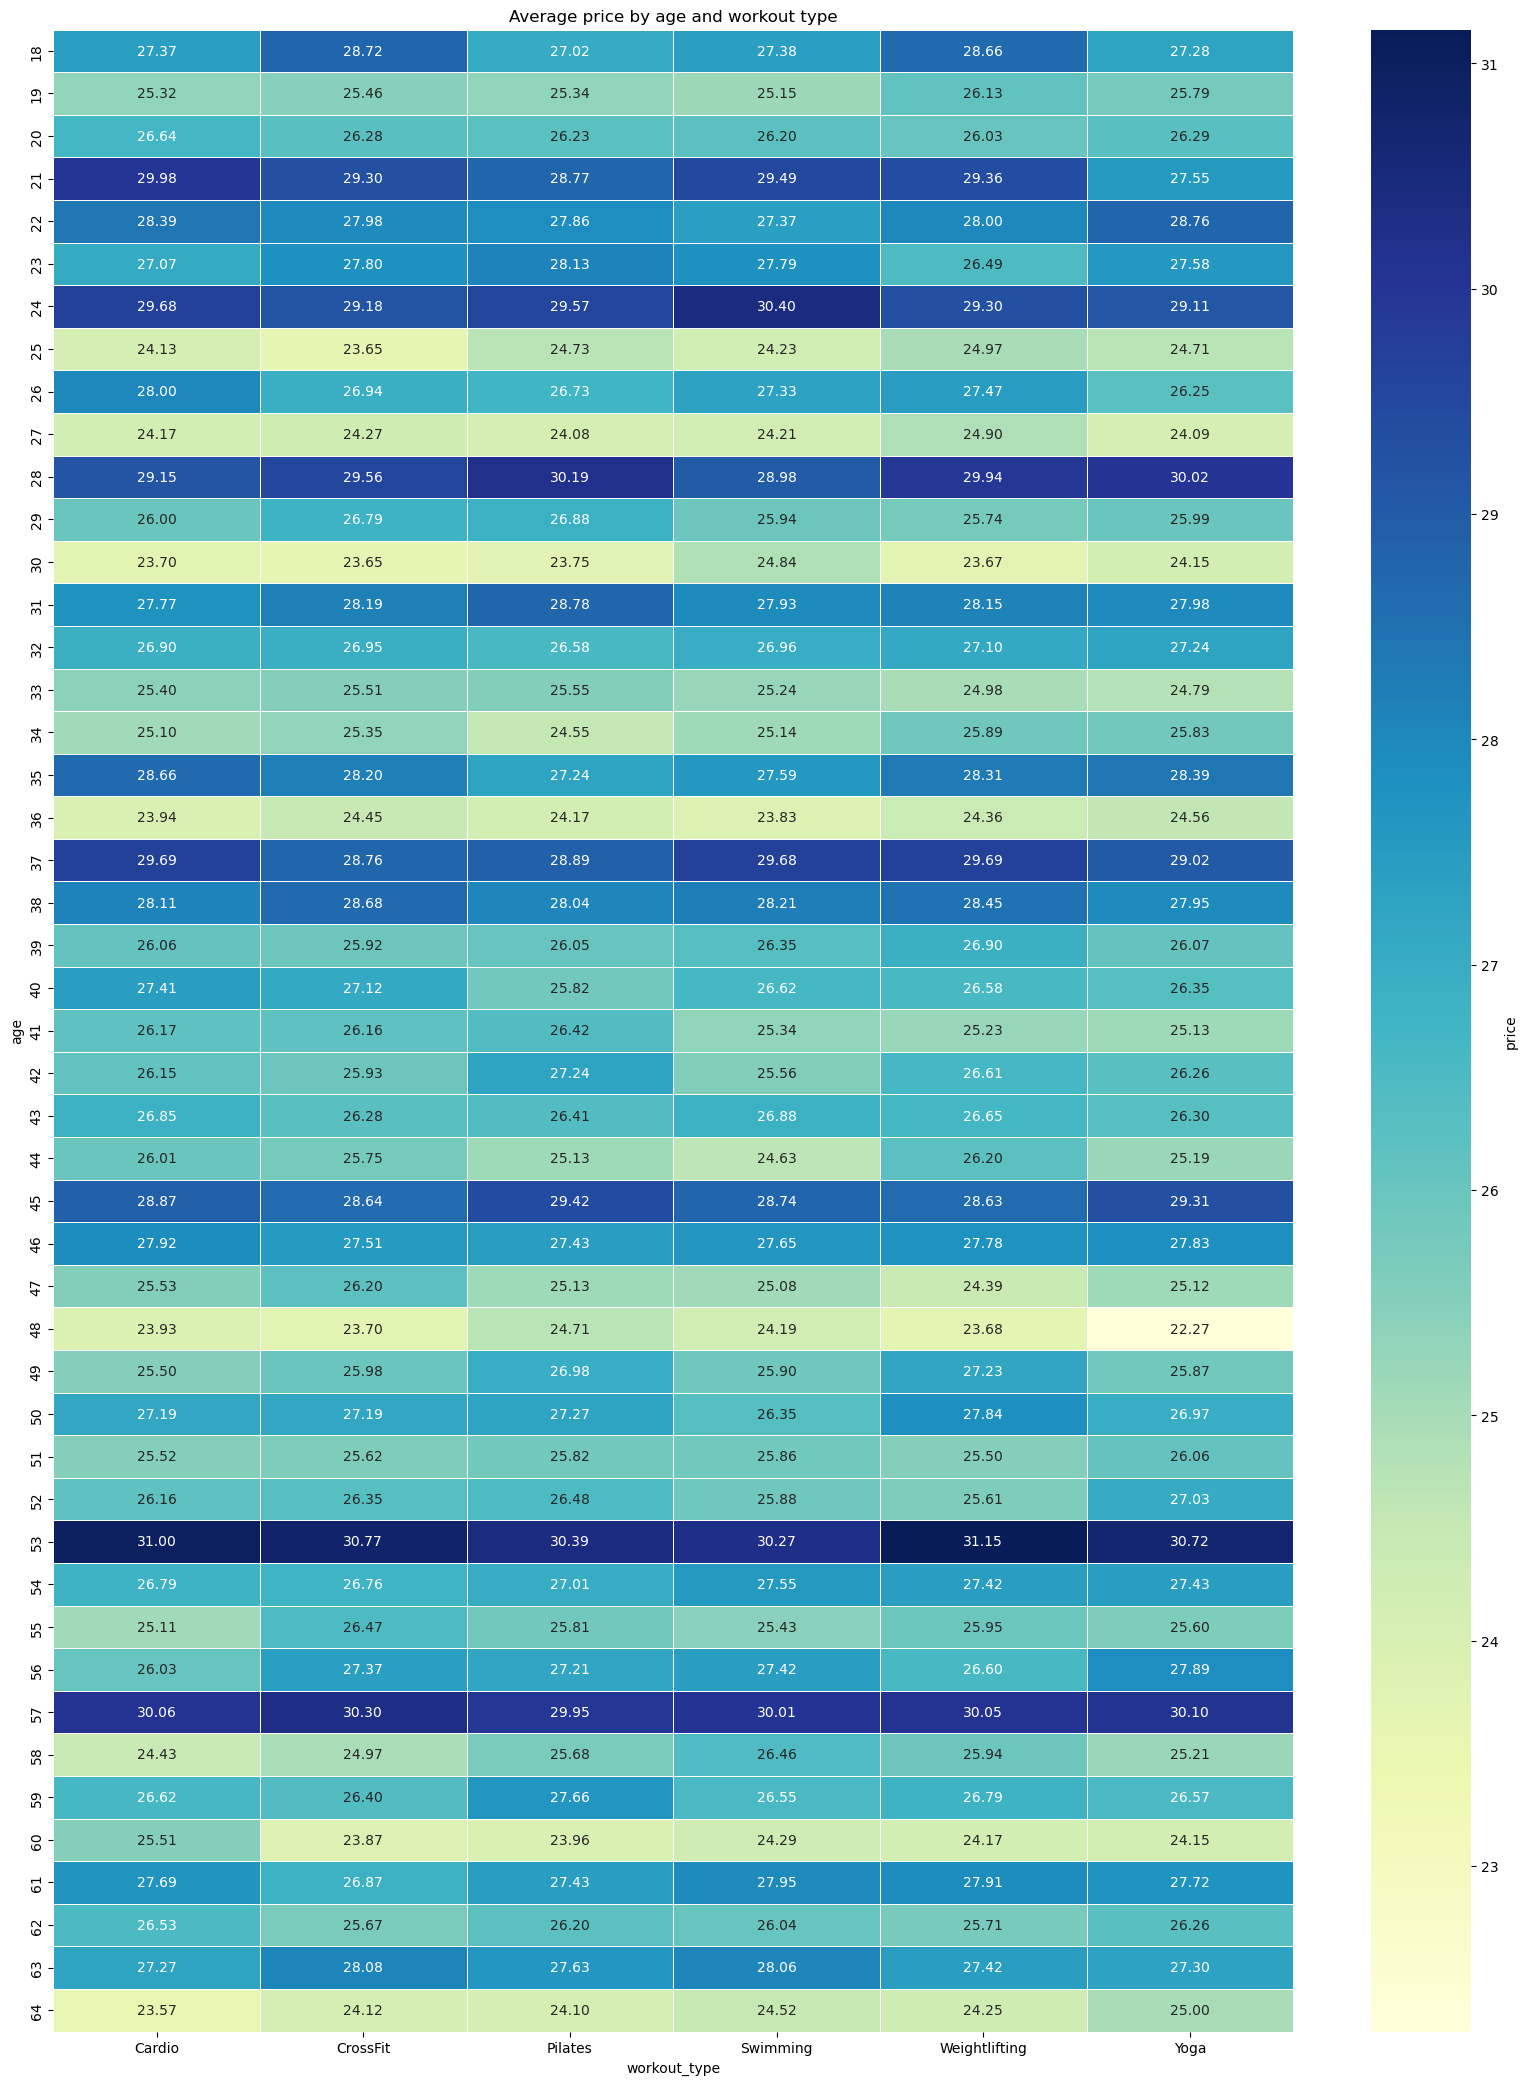

In [43]:
pivot_table = user.pivot_table(index='age', columns='workout_type', values='price_per_month', aggfunc='mean')

# Step 2: Plot the heatmap
plt.figure(figsize=(20, 26))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'price'})
plt.title('Average price by age and workout type')
plt.show()

### From the above analysis ages corresponding to darker shades have opted for the pro subscription_plan or are paying more in the gym
### Another important observation is that certain age groups which are more paying more in gym are almost equally investing in all workout types

<Axes: xlabel='age', ylabel='calories_burned'>

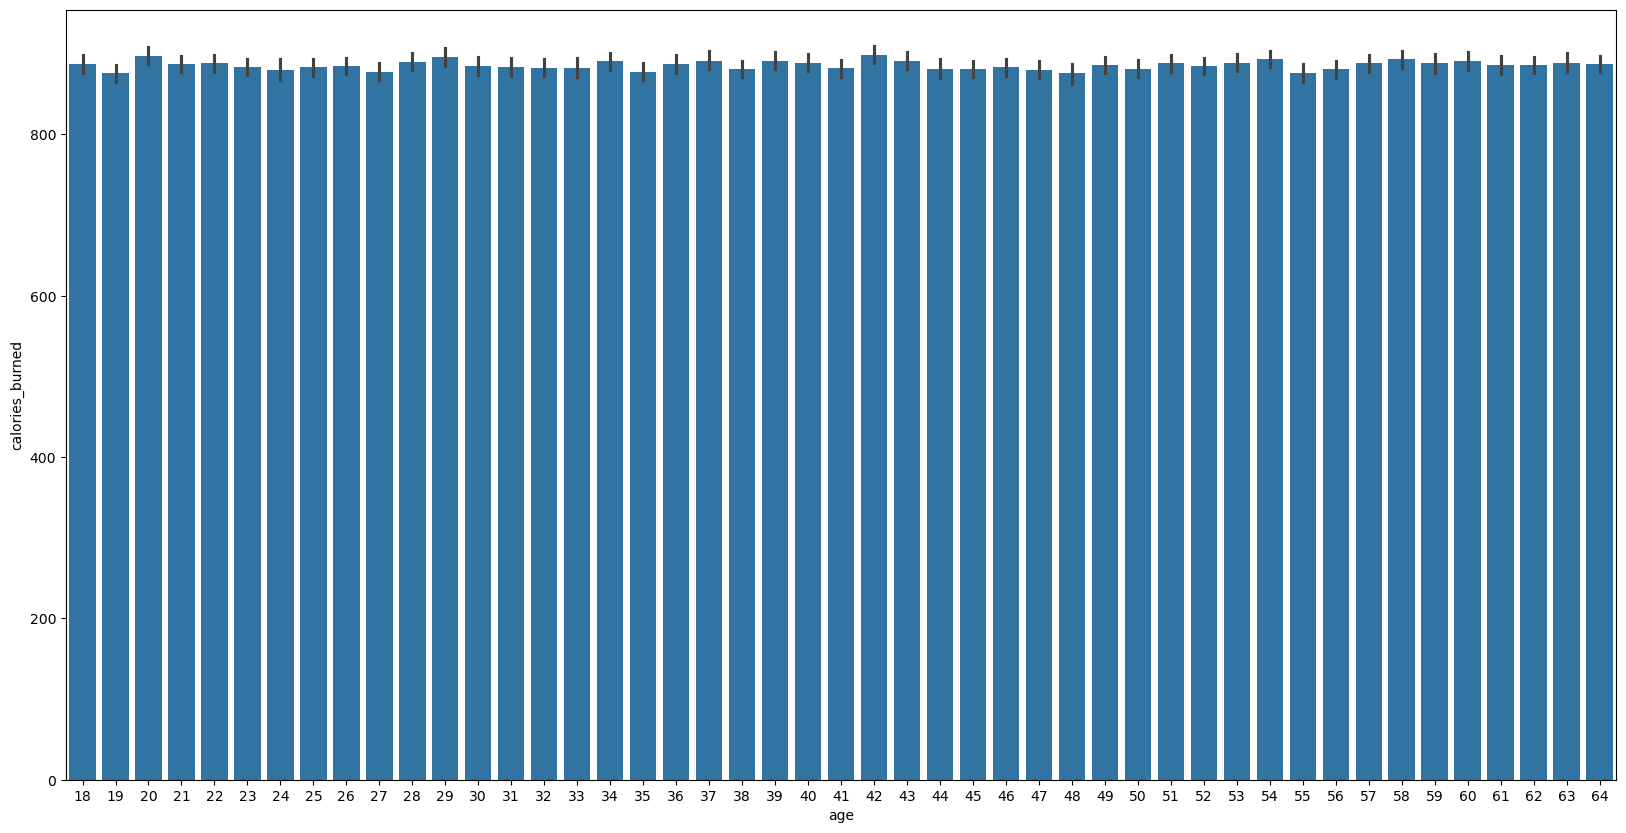

In [37]:
#analysis calories burned for each age group
plt.figure(figsize=(20, 10))
sns.barplot(x=user["age"], y=user["calories_burned"])

In [35]:
pv = user.pivot_table(index='age' , columns='gender' , values='calories_burned' ,aggfunc='mean') 
pv

gender,Female,Male,Non-binary
age,,,
18,889.247382,883.575188,893.860526
19,878.183261,871.616211,893.138462
20,902.911168,891.802206,898.248499
21,887.994681,882.213383,913.692182
22,875.031627,902.326394,876.058431
23,894.144823,876.701951,873.569328
24,876.636918,889.445686,845.793651
25,887.669489,881.089892,869.358289
26,879.110175,887.763487,898.762737


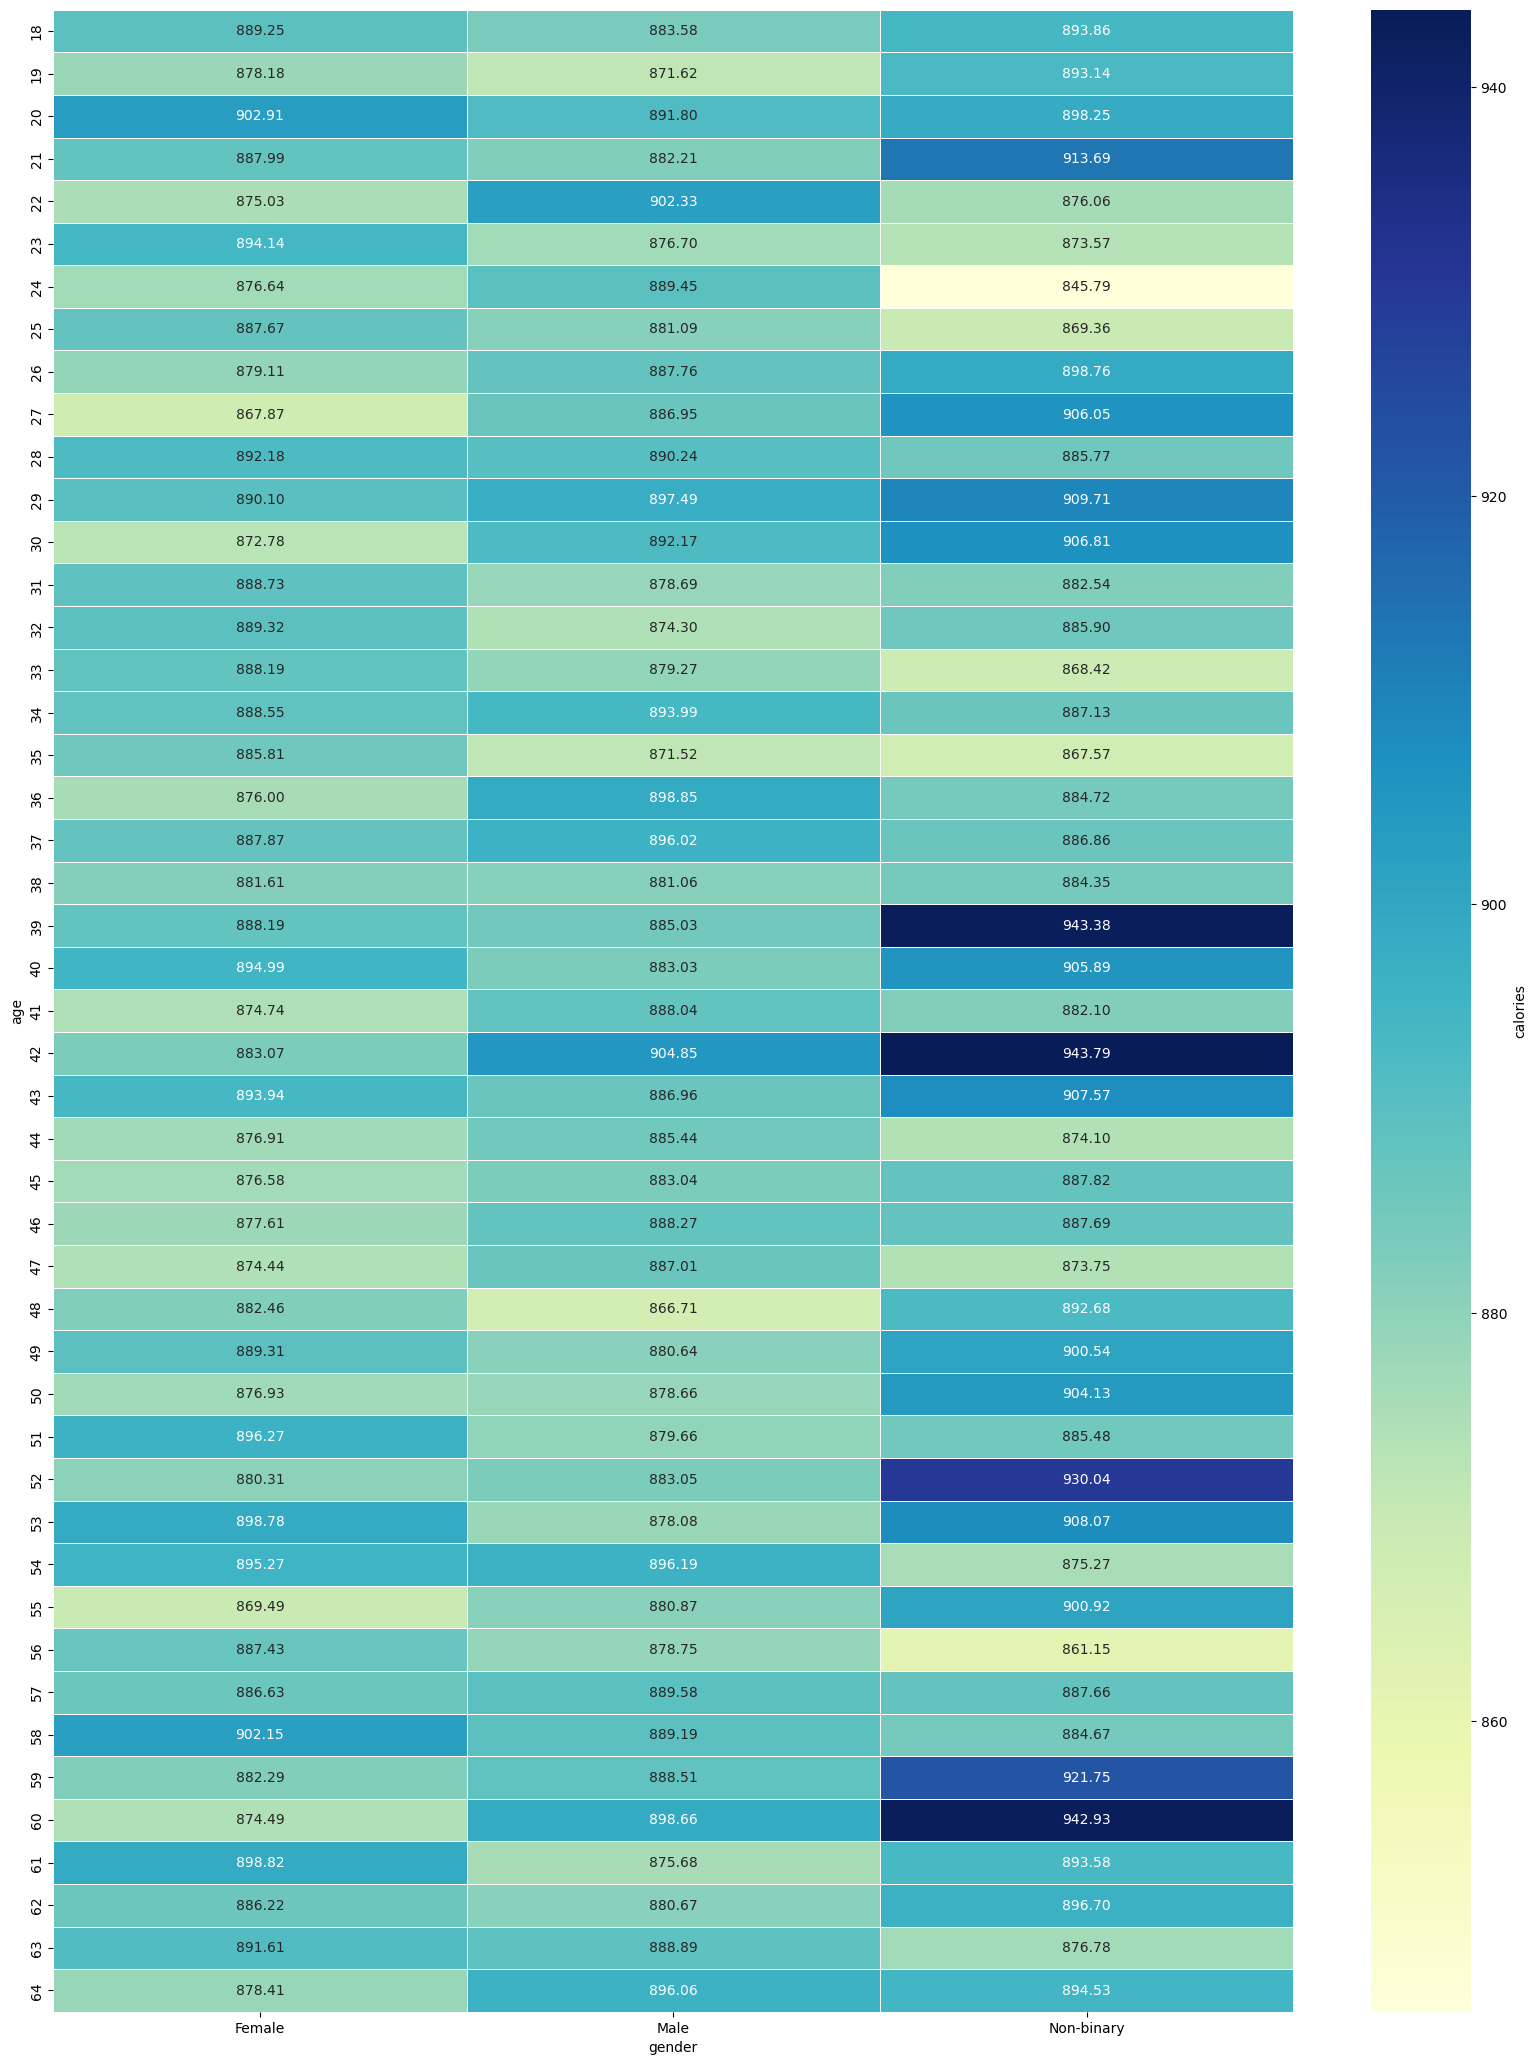

In [36]:
# Step 2: Plot the heatmap
plt.figure(figsize=(20, 26))
sns.heatmap(pv, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'calories'})
plt.title('Aver')
plt.show()

### The analysis shows that the average calories burnt by each age group everyday is above 845. 
### It can also be seen that for most age groups,non- binary gender has burnt more calories.